# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Zhen Han

Last Name: Si

Student ID: 999671870

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from nltk import corpus
from matplotlib import pyplot as plt
from itertools import chain
from collections import Counter
from nltk.corpus import stopwords
import urllib
from lxml import html
import requests
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import requests_cache
requests_cache.install_cache('demo_cache')
import math
import re
from functools import reduce
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction import text 

In [3]:
def Find_Link(url, page = 1):
    """
    This function gets the links of the given url of the aggie and also gets the page number
    Arg: the line (url) and the number of page (page)
    Return: article links 
    """
    
    response = requests.get(url + "page/" + str(page))

    soup = BeautifulSoup(response.text, "lxml")
    list = soup.find_all('h2')
    return [l.a.get('href') for l in list]

In [4]:
Find_Link('http://theaggie.org/campus/')

['https://theaggie.org/2018/03/13/last-week-in-senate-25/',
 'https://theaggie.org/2018/03/12/uc-regents-will-vote-on-nonresident-tuition-hike-on-wednesday/',
 'https://theaggie.org/2018/03/12/cheating-allegations-in-soc-46a/',
 'https://theaggie.org/2018/03/12/chancellor-creates-three-task-forces-to-improve-student-life/',
 'https://theaggie.org/2018/03/06/duke-law-professor-presents-lecture-voting-rights-law/',
 'https://theaggie.org/2018/03/05/last-week-senate-25-8/',
 'https://theaggie.org/2018/03/05/icc-warns-students-wary-suspicious-job-offering/',
 'https://theaggie.org/2018/03/04/uc-davis-student-protester-arrested-yiannopoulos-talk-last-year-awaits-trial/',
 'https://theaggie.org/2018/03/01/executive-ticket-candidates-claim-biases-non-asucd-affiliated-individuals/',
 'https://theaggie.org/2018/03/01/happiness-campaign-strives-less-stress-joy/',
 'https://theaggie.org/2018/02/27/senator-term-review-yajaira-ramirez-sigala/',
 'https://theaggie.org/2018/02/27/calpirgs-winter-quar

In [5]:
Find_Link('https://theaggie.org/sports/')

['https://theaggie.org/2018/03/11/doing-more-than-dribbling/',
 'https://theaggie.org/2018/03/09/uc-davis-wins-regular-season-big-west-conference-title-in-double-overtime-thriller/',
 'https://theaggie.org/2018/03/08/aggies-win-big-in-triple-overtime-victory/',
 'https://theaggie.org/2018/03/08/womens-basketball-tears-through-competition-in-2017-18-season/',
 'https://theaggie.org/2018/03/08/collaboration-brings-together-at-risk-youth-uc-davis-mens-basketball/',
 'https://theaggie.org/2018/03/06/lawsuit-filed-mlb-player-agency-performance-enhancing-drugs/',
 'https://theaggie.org/2018/03/04/proposed-california-bill-ban-tackle-football-children-14/',
 'https://theaggie.org/2018/03/01/womens-tennis-rolls-conference-play/',
 'https://theaggie.org/2018/03/01/womens-basketball-downs-uc-irvine-clinches-conference/',
 'https://theaggie.org/2018/03/01/shorts-buzzer-beater-wins-close-game-one-point/',
 'https://theaggie.org/2018/03/01/aggies-swept-creighton-heartbreaking-fashion/',
 'https://th

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [6]:
import re
def Extract_article(url):
    """
    This function is to extract the title, text, author for the given url
    Args: website link(url)
    Return: dictionary of the author, link, text and title (dict)
    """
    txt = []
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')
    data = soup.find_all("div",attrs={"itemprop": "articleBody"})
    data = data[0].find_all("p")
    a = data[-1]
    del data[-1]   
    for link in data:
        txt.append(link.text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22,0x2026:0x20 })) #https://stackoverflow.com/questions/816285/where-is-pythons-best-ascii-for-this-unicode-database
    if "\n" not in a:
        author = a.text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    else:
        r = a.text.split("\n")
        txt.append((r[0]))
        author = r[1].translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    text = reduce(lambda x,y: x+y,txt)
    title = soup.find_all("h1",attrs={"class": "entry-title"})[0].text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    dict = {'text':text,'url' : url,"author":author,"title":title}
    return dict

In [7]:
Extract_article("https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/")

{'author': 'Written By: Bianca Antunez \xa0—\xa0city@theaggie.org',
 'text': 'Davis residents create financial model to make city\'s financial state more transparentTo increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort w

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [8]:
def get(category):
    """
    This function creates a dataframe with 60 cols for each category 
    Arg: for this question: campus/city (category)
    Result: dataframe(data)
    """
    links = [Find_Link("http://theaggie.org/" + category +"/", x) for x in range(1,5)]
    data = pd.concat([pd.DataFrame(Extract_article(i)  for i in list) for list in links], ignore_index=True)
    data['category'] = category
    return data

campus = get("campus")
city = get("city")
data = campus
data = data.append(city).reset_index(drop = True)
data.head()

,author,text,title,url,category
0,Written by: George Liao — campus@theaggie.org,Funding for Student Advocates for Mental Healt...,Last week in Senate,https://theaggie.org/2018/03/13/last-week-in-s...,campus
1,Written by: Hannah Holzer — campus@theaggie.org,Proposed $978 tuition hikeAt the upcoming UC R...,UC Regents will vote on nonresident tuition hi...,https://theaggie.org/2018/03/12/uc-regents-wil...,campus
2,Written by: Sabrina Habchi — campus@theaggie.org,Controversy over academic honesty suspicions i...,Cheating allegations in SOC 46A,https://theaggie.org/2018/03/12/cheating-alleg...,campus
3,Written by: Jacqueline Moore — campus@theaggie...,"Task forces to review affordable housing, food...",Chancellor creates three task forces to improv...,https://theaggie.org/2018/03/12/chancellor-cre...,campus
4,Written by: Jacqueline Moore — campus@theaggie...,Guy-Uriel Charles speaks at King HallDuke Univ...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...,campus


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

# What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

In [8]:
import string

def split(texts):
    """
    This function splits the article into word segments
    Arg: rows(row)
    Result: data frame with text splitted 
    """
    thetext = texts[1].lower()
    for punct in string.punctuation:
        thetext = thetext.replace(punct,"")
    words = thetext.split()
    data2 = pd.DataFrame({'word': words})
    data2['title'] = texts[2]
    data2['category'] = texts[4]
    data2['url'] = texts[3]
    return data2

all_words = pd.concat([split(data.loc[i]) for i in range(0, 120)])

In [9]:
#import nltk
#nltk.download()

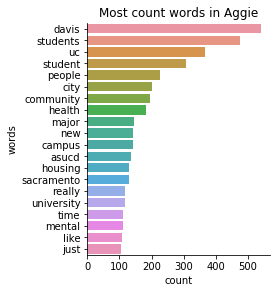

In [10]:
stop = text.ENGLISH_STOP_WORDS.union(['said','—','also','would'])
#stopwords = nltk.corpus.stopwords.words('english')
#stopwords.append('—')
#stopwords.append('said')
#stopwords.append('also')
#stopwords.append('would')

def getwordCount(words):
    """
    This function get the top 20 most used words in the articles, and these words are not the stop words.
    Arg: splitted words 
    Result: Counts 
    """
    Count_data = pd.DataFrame(words['word'].value_counts())
    Count_data['words'] = Count_data.index
    Count_data.columns = ['count','words']
    Count_data = Count_data.loc[[i not in stop for i in Count_data.words], :]
    return Count_data

Aggieword = getwordCount(all_words)
Aggiewords2 = Aggieword[0:20]
sns.factorplot("count", "words", data = Aggiewords2, kind = "bar")
plt.title('Most count words in Aggie')
plt.show()

After I eliminate some english words and uncorrelated words, the most covered words for Aggie link are "davis", "students", "uc", "student", "people", "city" and etc. This doesnt give a lot of information about which specific topics are most covered in aggie, but obviously this is a school website because all the most covered words are about city and students. 

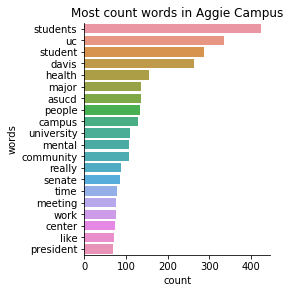

In [11]:

Campus = all_words.loc[all_words['category'] == 'campus']
Campus_wordCount = getwordCount(Campus)
Campus_word = Campus_wordCount[0:20]
sns.factorplot("count", "words", data = Campus_word, kind = "bar")
plt.title('Most count words in Aggie Campus')
plt.show()

According to the plot, words like "students", "uc", "student", "davis", "health", "campus", "major", and etc. are frequently mentioned. These words are close related to the campus life and thats normal why these words are mentioned many times. 

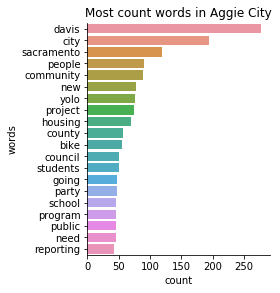

In [12]:

City = all_words.loc[all_words['category'] == 'city']
City_wordCount = getwordCount(City)
City_word = City_wordCount[0:20]
sns.factorplot("count", "words", data = City_word, kind = "bar")
plt.title('Most count words in Aggie City')
plt.show()

According to the plot, words like "davis", "city", "sacremento", "people", "project", "community", "housing", and etc. are frequently mentioned. These words are close related to the daily life and thats normal why these words are mentioned in city section many times.

So base on the results above we can see the difference between articles in City section and Campus section. Campus section more cared about school stuffs and students, while city section more care about daily life and public things related to Davis and sacremento. 

# 2 What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

In [28]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:

tokenize = nltk.word_tokenize
def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    get simple lemmas according to stemming and tokenization
    Arg: string of text
    Result: lemmata
    """
    return stem(tokenize(text))

In [14]:
from sklearn.feature_extraction import text 
stop = text.ENGLISH_STOP_WORDS.union(['said','—','also','would'])

txt = []
for i in data["text"]:
    txt.append(i)
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words = stop,smooth_idf=True,norm="l2")
tfs_text = vectorizer.fit_transform(txt)
norm = tfs_text.dot(tfs_text.T)
norm = norm.toarray()

In [15]:
for i in range(1,121):
    for x in range(0,i):
        norm[i-1,x] = -1
norm

array([[-1.        ,  0.23503348,  0.26849766, ...,  0.21402265,
         0.16730559,  0.14719443],
       [-1.        , -1.        ,  0.17513563, ...,  0.15373709,
         0.10593859,  0.09187457],
       [-1.        , -1.        , -1.        , ...,  0.28115438,
         0.16224669,  0.15254768],
       ..., 
       [-1.        , -1.        , -1.        , ..., -1.        ,
         0.22634764,  0.12467238],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        ,  0.10948507],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [16]:
indices =  np.argpartition(norm.flatten(), -3)[-3:]

topThree = np.vstack(np.unravel_index(indices, norm.shape)).T
topThree

array([[17, 25],
       [ 8, 20],
       [18, 43]])

In [17]:
print(data["title"].iloc[topThree[0]])
print(data["title"].iloc[topThree[1]])
print(data["title"].iloc[topThree[2]])

17             ASUCD executive tickets hold CoHo debate
25    2018 ASUCD Winter Elections — meet the candidates
Name: title, dtype: object
8     Executive ticket candidates claim biases again...
20    Adam Hatefi and Shreya Deshpande disqualified ...
Name: title, dtype: object
18            Mental Health Town Hall erupts in protest
43    Internal audit reveals steep decline in counse...
Name: title, dtype: object


In [19]:
#this cell is for previous bug detection, please ignore. 
#indices =  np.argpartition(norm.flatten(), -4)[-4:]
#topThree = np.vstack(np.unravel_index(indices, norm.shape)).T
#topThree
#topThree = np.delete(topThree,(3), axis=0)
#topThree
#print(data["title"].iloc[topThree[0]])
#print(data["title"].iloc[topThree[1]])
#print(data["title"].iloc[topThree[2]])

array([[36, 55],
       [11, 36],
       [ 1, 13]])

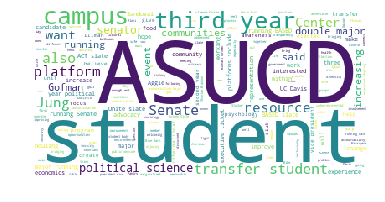

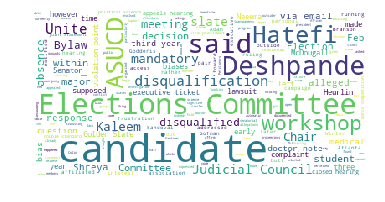

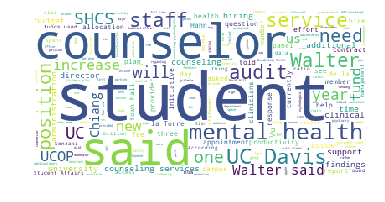

In [18]:
def find_image(txt_1,txt_2):
    """
    Make the word Cloud
    Arg: texts
    Result: Word Cloud plot
    """
    pair = []
    pair.extend([txt_1,txt_2])
    pair_1 = reduce(lambda x,y: x+y,pair)
    wc = WordCloud(background_color="white", max_words=200)
    wc.generate(pair_1)
    return wc
plt.imshow(find_image(data["text"].iloc[topThree[0][0]],data["text"].iloc[topThree[0][1]]))
plt.axis("off")
plt.show()
plt.imshow(find_image(data["text"].iloc[topThree[1][0]],data["text"].iloc[topThree[1][1]]))
plt.axis("off")
plt.show()
plt.imshow(find_image(data["text"].iloc[topThree[2][0]],data["text"].iloc[topThree[2][1]]))
plt.axis("off")
plt.show()

In [20]:
def compare_data(data, wordCount, i, count):
    """
    This function compare the pairs articles and get the same words
    Arg: data (data), wordCount(dataframe), i(array), count(counts number)
    Result: comparison result 
    """
    title1 = data.loc[i[0]].title
    title2 = data.loc[i[1]].title
    
    print("No." + str(count) + " pair:")
    print(title1 + "\n" + title2 + "\n\n")
    
    compare = wordCount.loc[(wordCount['title'] == title1) | (wordCount['title'] == title2)]
    return compare

frame = []
count = 0
for i in topThree:
    count += 1
    df1 = compare_data(data, all_words, i, count)
    frame.append(df1)
frame

No.1 pair:
ASUCD executive tickets hold CoHo debate
2018 ASUCD Winter Elections — meet the candidates


No.2 pair:
Executive ticket candidates claim biases against non-ASUCD affiliated individuals
Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop


No.3 pair:
Mental Health Town Hall erupts in protest
Internal audit reveals steep decline in counselors, $250,000 worth of questionably allocated funds




[               word                                              title  \
 0        candidates           ASUCD executive tickets hold CoHo debate   
 1           discuss           ASUCD executive tickets hold CoHo debate   
 2               how           ASUCD executive tickets hold CoHo debate   
 3                to           ASUCD executive tickets hold CoHo debate   
 4               end           ASUCD executive tickets hold CoHo debate   
 5          toxicity           ASUCD executive tickets hold CoHo debate   
 6            within           ASUCD executive tickets hold CoHo debate   
 7         senatethe           ASUCD executive tickets hold CoHo debate   
 8             three           ASUCD executive tickets hold CoHo debate   
 9         executive           ASUCD executive tickets hold CoHo debate   
 10          tickets           ASUCD executive tickets hold CoHo debate   
 11          running           ASUCD executive tickets hold CoHo debate   
 12              for     

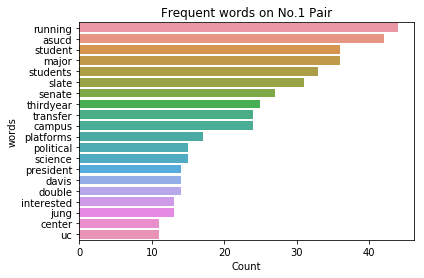

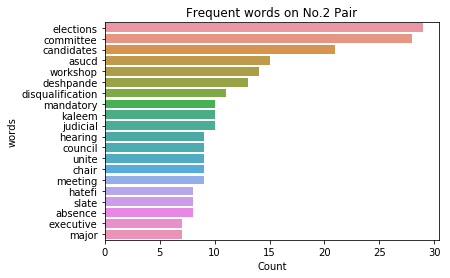

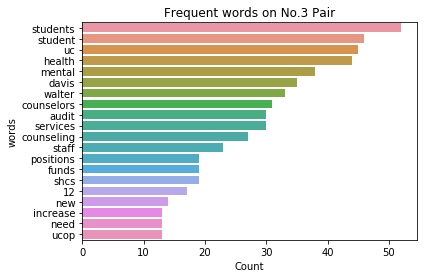

In [21]:
frequentword = [getwordCount(frame[i]) for i in range(0,3)]

def plot(count):
    """
    This function is to draw the bar chart of common words 
    Arg: counts
    Result: the plot
    """    
    sns.barplot('count', 'words', data = frequentword[count].head(20))
    plt.title('Frequent words on No.' + str(count+1) + ' Pair')
    plt.xlabel('Count')
    plt.ylabel('words')
    plt.show()
    
for x in range(0,3):
    plot(x)

I didnt exclude the stopwords I added (such as said, would) in making the wordcloud to see whether these words have a great contribution to the similarity of two articles here. Then I find out the answer is yes so I select out these words from the similar article findings and made a barplot of similar words here.
So for the similarity:
No.1 pair:
ASUCD executive tickets hold CoHo debate
2018 ASUCD Winter Elections — meet the candidates
No.2 pair:
Executive ticket candidates claim biases against non-ASUCD affiliated individuals
Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop
No.3 pair:
Mental Health Town Hall erupts in protest
Internal audit reveals steep decline in counselors, $250,000 worth of questionably allocated funds

We can see for the first pair, 'running', 'asucd','student','major','students' appear many times in the first pair of two articles, so i think these two articles are both talking about ASUCD elections and introducing the candidates. 

For the second pair, 'elections','committee','candidates','asucd','workshop','disqualification' appear many times for the both articles so I think it may about the asucd elections and it may have some unfair or disqualification of candidates during the election. 

For the third pair, 'students','student','uc','health','mental' appear many times so I think these two articles are talking about students doing something about the mental health services. 

# 3 Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

I don't think this corpus is a good representative of the Aggie because of several reasons. First, we only scrape the most recent news on the Aggie. They are the events that happend in the recent weeks and are not representative of the Aggie. 

Second, there are lots of category in The Aggie except campus and city, such as sports, technology. 

Third, the website update every week or even every week and we only get 4 pages of articles. This is a very limited number compared to the whole. 

This corpus infers that the aggie website often talks about the news of students, UC Davis, education, health, city and campus life in the articles. So we can conclude that aggie link are mainly focusing on students' life in campus and cities. It is mainly about students. I also find out that if two articles looks same means they are talking about the same topic. 